## Perceptrón

Un caso particular de problemas de clasificación son los linealmente separables. En estos problemas, las clases se distribuyen en el espacio de características de tal forma que se pueden separar unas de otras mediante superficies de decisión que son hiperplanos. Para el caso bidimensional, esta superficie de decisión se corresponde con una recta. Por tanto, la función discriminante, $f(\mathbf{X})$ se obtiene como una combinación lineal de las características:

$f(\mathbf{X}) = w_0 + w_1 \, x_1 + w_2 \, x_2 + \dots + w_n \, x_n = w_0 + \mathbf{w}^{T} \, \mathbf{X}$

Y como se indicó antes, la superficie de decisión, $f(\mathbf{X})=0$, se corresponde a un hiperplano en el espacio n-dimensional. En el caso de dimensión 2, la superficie de decisión se corresponde con:

$w_0 + w_1 \, x_1 + w_2 \, x_2 = 0$

que es la ecuación de una recta, donde $x_2$ se puede obtener como:

$x_2 = -\frac{w_1}{w_2} \, x_1 - \frac{w_0}{w_2}$

Arquitectura:

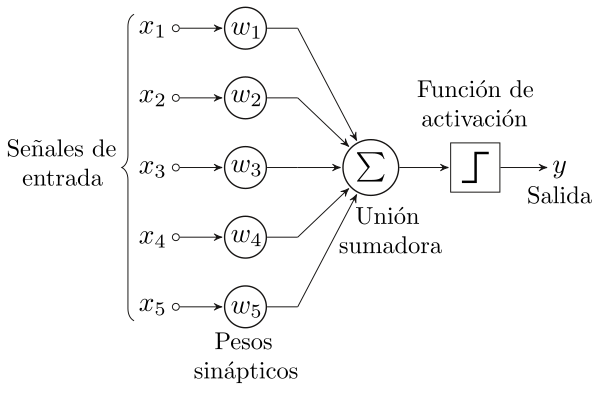

Función de activación:

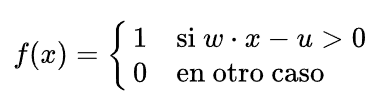


In [50]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

Se pueden generar conjuntos de datos tipo nubes de puntos (blobs) utilizando la función make_blobs. El primer argumento es el número de muestras (puntos) que se generan. El segundo argumento (n_features) es la dimensión del espacio de representación (número de características) y el tercer argumento (centers) está relacionado con las clases. Si se indica un número entero se generan tantas clases como indica el entero introducido con los centros elegidos aleatoriamente entre los valores -10 y 10, a no ser que se indique otro rango con el argumento center_box. Otra posibilidad es introducir una lista de tuplas donde cada tupla tiene el mismo número de elementos que el número de características y el número de tuplas indica cuantas clases hay. La dispersión de los puntos en cada blob se puede controlar mediante el parámetro cluster_std que si es un valor, se aplica a todos los blobs, mientras que si es una lista indica la dispersión de cada blob.

(300, 2)
(300,)


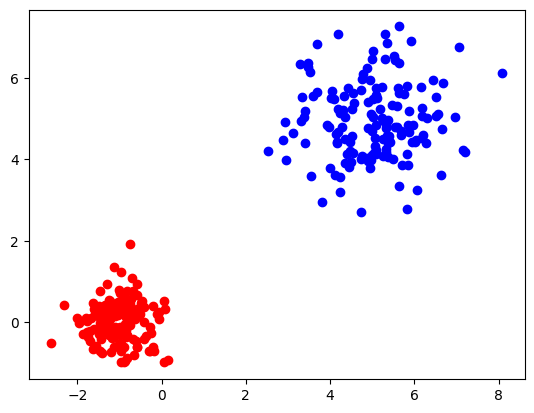

In [51]:
X, y = make_blobs(
    300, # numero de muestras
    n_features=2, # numero de caracteristicas
    centers=[(-1,0), (5,5)], # centros de las muestras (o cantidad de muestras)
    cluster_std=[0.5, 1], # desviacion estandar de las muestras
    random_state=42 # semilla
)

print(X.shape)
print(y.shape)

# X es un array de 300 filas y 2 columnas
# y es un array de 300 filas y 1 columna

# Graficar los datos generados

plt.scatter(X[y==0, 0], X[y==0, 1], c='r')
plt.scatter(X[y==1, 0], X[y==1, 1], c='b')
plt.show()

In [52]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score # para medir la precision del modelo (media de aciertos)

clf = Perceptron()
clf.fit(X, y)

print(clf.coef_) # coeficientes de las caracteristicas, es una lista de listas porque puede haber mas de una clase
print(clf.intercept_) # termino independiente
print(f"Precisión: {accuracy_score(y, clf.predict(X))}")

[[6.23373181 1.76206791]]
[-2.]
Precisión: 1.0


Para mostrar gráficamente la recta en el caso de dos dimensiones, es necesario obtener la ecuación de la recta a partir de los pesos como:

$x_2 = -\frac{w_1}{w_2} x_1 - \frac{w_0}{w_2}$

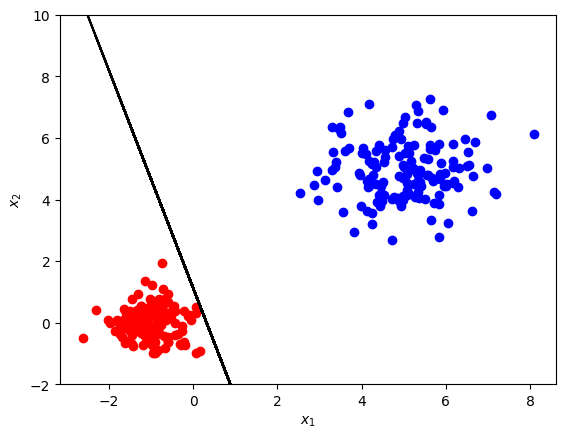

In [53]:
m = -clf.coef_[0][0] / clf.coef_[0][1] # pendiente
n = -clf.intercept_[0] / clf.coef_[0][1] # ordenada al origen
recta = X[:,0] * m + n # X[:,0] * m + n = 0 -> x1 * m + n = 0
plt.scatter(X[y==0,0],X[y==0,1], c='r') # graficar los puntos de la clase 0
plt.scatter(X[y==1,0],X[y==1,1], c='b') # graficar los puntos de la clase 1
plt.plot(X[:,0], recta, 'black') # graficar la recta
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.ylim(-2, 10) # limitar el eje y
plt.show()

Si tuvieramos más clases, entonces tendriamos una recta por cada clase

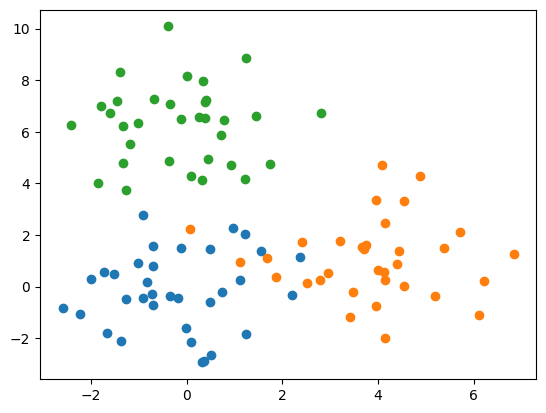

In [54]:
X, y = make_blobs(100, n_features=2, centers=[(0,0), (4,1), (0,6)], cluster_std=1.5, random_state=42)

n_clases=3
for clase in range(n_clases):
    puntos_clase = y == clase
    plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
plt.show()

In [55]:
clf = Perceptron()

clf.fit(X, y)
print(clf.coef_) # coeficientes de las caracteristicas

[[-4.29008428 -3.9463111 ]
 [ 6.79534562 -4.3104603 ]
 [-4.58589166 13.20228547]]


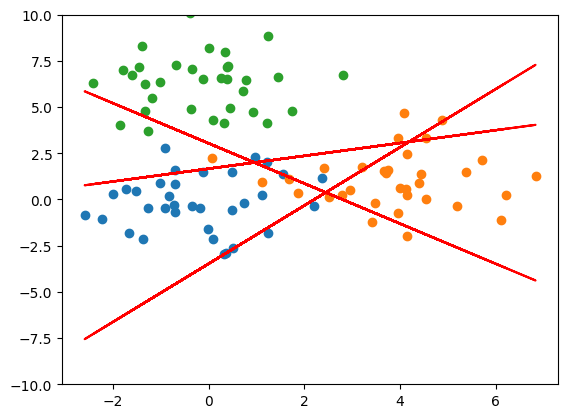

In [56]:
for clase in range(n_clases):
    m = -clf.coef_[clase][0] / clf.coef_[clase][1]
    n = -clf.intercept_[clase] / clf.coef_[clase][1]
    recta = X[:,0] * m + n
    puntos_clase = y == clase
    plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
    plt.plot(X[:,0], recta, 'r')
plt.ylim(-10, 10)
plt.show()

## Clasificar iris mediante Perceptron

In [57]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv('datos/iris.csv', sep=',')
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
df_train, df_test = train_test_split(df, test_size=0.2)
X_train = df_train.values[:,:-1]
y_train = df_train.values[:,-1]
X_test = df_test.values[:,:-1]
y_test = df_test.values[:,-1]

In [61]:
clf = Perceptron(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
exactitud = accuracy_score(y_test, y_pred)
print(f'Exactitud perceptron: {exactitud*100:.2f}%')

Exactitud perceptron: 63.33%


## Evolución de descenso según el gradiente de las superficie de decisión

La clase SGDClassifier permite obtener las superficies de decisión para el perceptrón y se puede ejecutar paso a paso (partial_fit) para ver como van cambiando las superficies. 

Para evitar que la reordenación de las muestras afecte al análisis de la evolución del método se puede poner el argumento shuffle=False, de forma que en cada época las muestras mantengan el mismo orden.

IMPORTANTE: con partial_fit debe pasarse todas las clases que existen en el conjunto de aprendizaje.

In [62]:
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent
import numpy as np

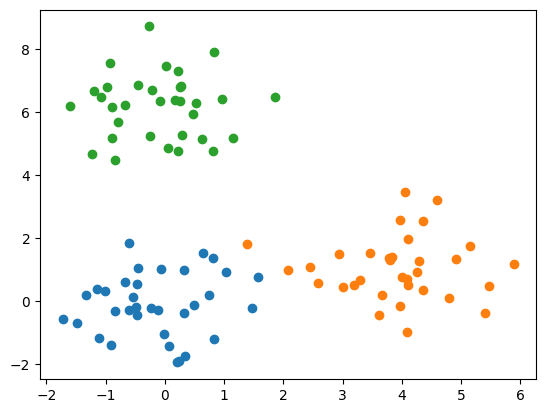

In [63]:
X, y = make_blobs(100, n_features=2, centers=[(0,0), (4,1), (0,6)], cluster_std=1, random_state=42)

n_clases=3
for clase in range(n_clases):
    puntos_clase = y == clase
    plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
plt.show()

In [64]:
def dibuja_rectas(X, n_clases, pesos, peso_umbral):
    for clase in range(n_clases):
        m = -pesos[clase][0] / pesos[clase][1]
        n = -peso_umbral[clase] / pesos[clase][1]
        recta = X[:,0] * m + n
        puntos_clase = y == clase
        plt.scatter(X[puntos_clase,0], X[puntos_clase, 1])
        plt.plot(X[:,0], recta, 'r')
    plt.ylim(-10, 10)
    plt.show()    

In [65]:
clf = SGDClassifier(loss='perceptron', learning_rate='constant', eta0=0.0001, shuffle=False)

Iteracion 0 || Exactitud perceptron: 95.00%


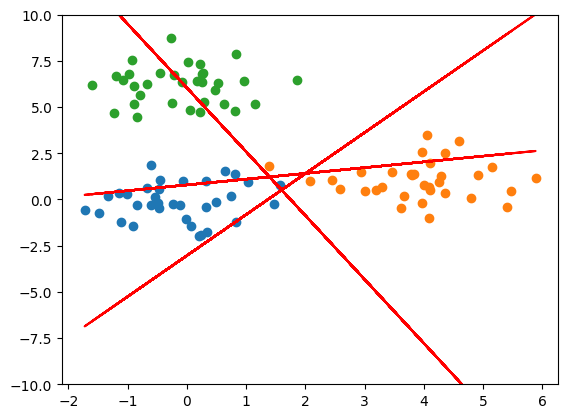

Iteracion 1 || Exactitud perceptron: 98.00%


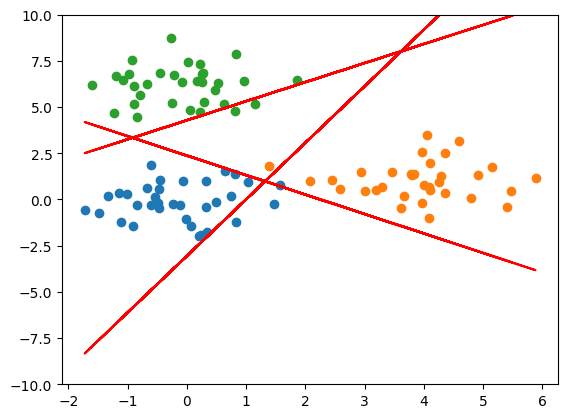

Iteracion 2 || Exactitud perceptron: 98.00%


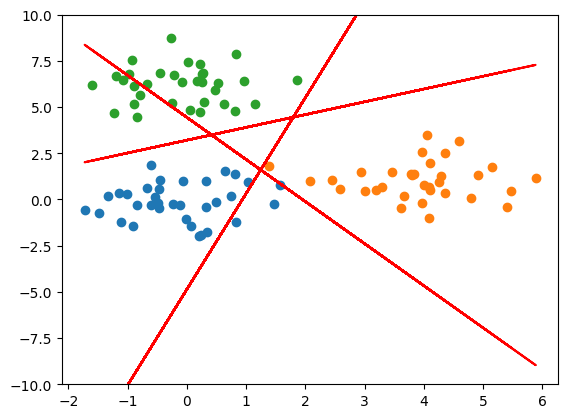

Iteracion 3 || Exactitud perceptron: 99.00%


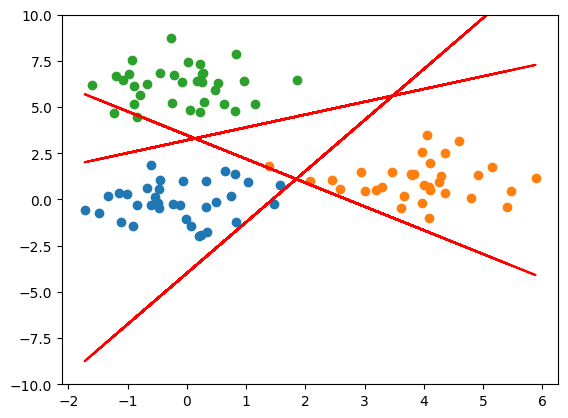

Iteracion 4 || Exactitud perceptron: 98.00%


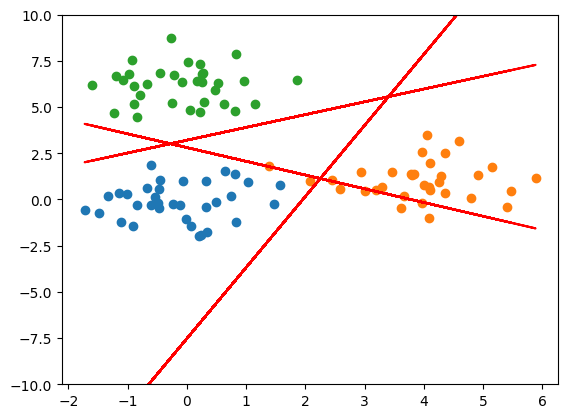

Iteracion 5 || Exactitud perceptron: 99.00%


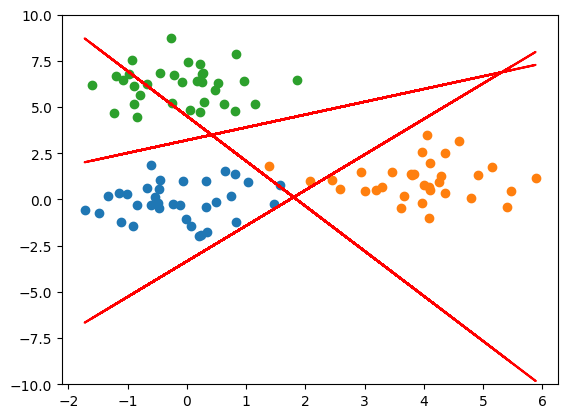

Iteracion 6 || Exactitud perceptron: 100.00%


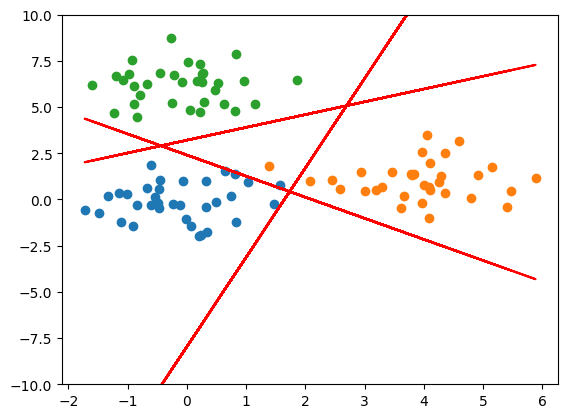

Iteracion 7 || Exactitud perceptron: 99.00%


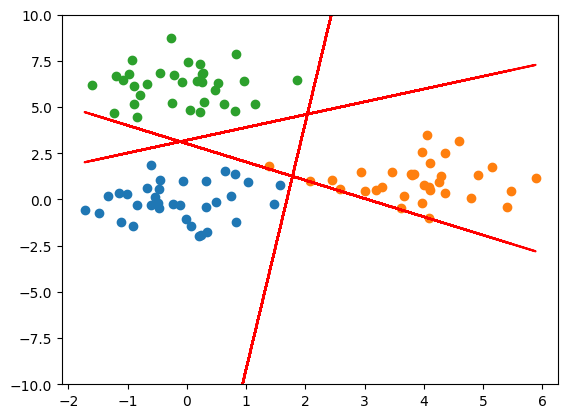

Iteracion 8 || Exactitud perceptron: 98.00%


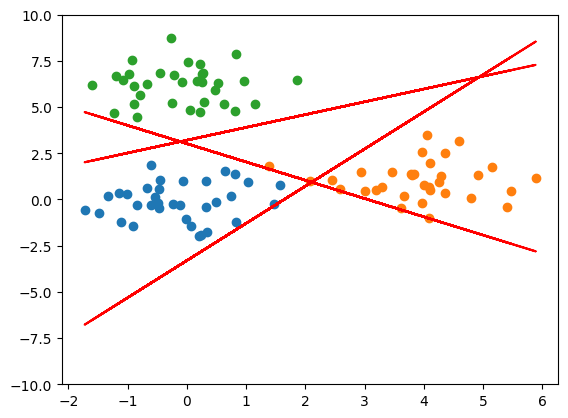

Iteracion 9 || Exactitud perceptron: 99.00%


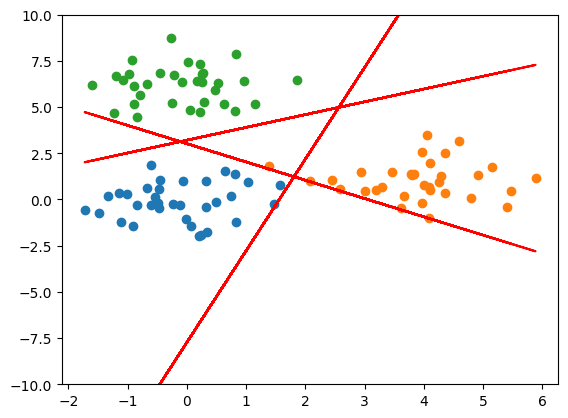

In [66]:
for iter in range(10):
    clf.partial_fit(X,y, classes=np.unique(y))
    y_pred = clf.predict(X)
    exactitud = accuracy_score(y, y_pred)
    print(f'Iteracion {iter} || Exactitud perceptron: {exactitud*100:.2f}%')
    dibuja_rectas(X, n_clases, clf.coef_, clf.intercept_)